In [5]:
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_is_fitted

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self,X):
        check_is_fitted(self)
        return np.zeros( (len(X), 1))
    
fakemodel = MyFakeClassifier()
# fakemodel.fit(X_trian, y_train)
fakemodel.predict([1,2,3])

# 1. fit 메서드가 존재
# 2. check_is_fitted 함수안에 넣어줘야함

NotFittedError: This MyFakeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [20]:
class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.ones( (len(X), 1))

In [103]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

# 번호가 7이면 True==1, 그 외는 False==0
y = (digits.target != 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [104]:
import numpy as np
from sklearn.metrics import accuracy_score

fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print(f'정확도:{accuracy_score(y_test , fakepred):.3f}')

정확도:0.900


In [105]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[  0,  45],
       [  0, 405]], dtype=int64)

In [106]:
405 / 450

0.9

In [107]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_test, fakepred))
print(recall_score(y_test, fakepred))

0.9
1.0


In [26]:
import pandas as pd
# 타이타닉 데이터
X_titanic_df = pd.read_csv('data/ml/titanic_X.csv')
y_titanic_df = pd.read_csv('data/ml/titanic_y.csv')
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
test_size = 0.2, random_state = 0)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
matrix = confusion_matrix(y_test, pred)
matrix

C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[94, 16],
       [19, 50]], dtype=int64)

In [57]:
(matrix[0,0] + matrix[1,1]) / matrix.sum()

0.8044692737430168

In [58]:
print('재현율', matrix[1,1] / (matrix[1,0] + matrix[1,1]))
print('정밀도', matrix[1,1] / (matrix[0,1] + matrix[1,1]))

재현율 0.7246376811594203
정밀도 0.7575757575757576


In [62]:
pred2 = (lr_clf.predict_proba(X_test)[:, 1] > 0.4).astype(int)

In [63]:
matrix2 = confusion_matrix(y_test, pred2)
matrix2

array([[90, 20],
       [14, 55]], dtype=int64)

In [64]:
print('재현율', matrix2[1,1] / (matrix2[1,0] + matrix2[1,1]))
print('정밀도', matrix2[1,1] / (matrix2[0,1] + matrix2[1,1]))

재현율 0.7971014492753623
정밀도 0.7333333333333333


In [65]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1, 2], [ 2, 0, 0], [ 0, 1.1, 1.2]]
binarizer = Binarizer(threshold= 1.1) 
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [68]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba

array([[0.81671023, 0.18328977],
       [0.87942787, 0.12057213],
       [0.96299535, 0.03700465],
       [0.05220712, 0.94779288],
       [0.19369059, 0.80630941],
       [0.59405123, 0.40594877],
       [0.06815556, 0.93184444],
       [0.04902433, 0.95097567],
       [0.50090852, 0.49909148],
       [0.20607946, 0.79392054],
       [0.92015712, 0.07984288],
       [0.24913612, 0.75086388],
       [0.86200122, 0.13799878],
       [0.07894351, 0.92105649],
       [0.03429297, 0.96570703],
       [0.18271031, 0.81728969],
       [0.84809947, 0.15190053],
       [0.80955086, 0.19044914],
       [0.89938934, 0.10061066],
       [0.59315478, 0.40684522],
       [0.7159994 , 0.2840006 ],
       [0.04731036, 0.95268964],
       [0.86200777, 0.13799223],
       [0.66854332, 0.33145668],
       [0.23210173, 0.76789827],
       [0.10232337, 0.89767663],
       [0.88842552, 0.11157448],
       [0.23374377, 0.76625623],
       [0.1480618 , 0.8519382 ],
       [0.43535588, 0.56464412],
       [0.

In [70]:
not (0.81671023 > 0.5)

False

In [71]:
0.18328977 > 0.5

False

In [79]:
pred2 = (pred_proba[:, 1] > 0.5).astype(int)

In [80]:
binarizer = Binarizer(threshold = 0.5) 
pred3 = binarizer.fit_transform(pred_proba[:, 1].reshape(1,-1))[0]

In [82]:
print(accuracy_score(pred, pred2))
print(accuracy_score(pred2, pred3))
print(accuracy_score(pred, pred3))

1.0
1.0
1.0


In [84]:
threshold = 0.5
pred2 = (pred_proba[:, 1] > threshold).astype(int)

print(confusion_matrix(y_test, pred2))
print(accuracy_score(y_test, pred2))
print(precision_score(y_test, pred2))
print(recall_score(y_test, pred2))

[[94 16]
 [19 50]]
0.8044692737430168
0.7575757575757576
0.7246376811594203


In [85]:
threshold = 0.6
pred2 = (pred_proba[:, 1] > threshold).astype(int)

print(confusion_matrix(y_test, pred2))
print(accuracy_score(y_test, pred2))
print(precision_score(y_test, pred2))
print(recall_score(y_test, pred2))

[[97 13]
 [25 44]]
0.7877094972067039
0.7719298245614035
0.6376811594202898


In [87]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test ,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        print(confusion_matrix(y_test, custom_predict))
        print(accuracy_score(y_test, custom_predict))
        print(precision_score(y_test, custom_predict))
        print(recall_score(y_test, custom_predict))

        
get_eval_by_threshold(y_test ,pred_proba[:, 1].reshape(-1,1), thresholds )


임곗값: 0.4
[[90 20]
 [14 55]]
0.8100558659217877
0.7333333333333333
0.7971014492753623
임곗값: 0.45
[[92 18]
 [18 51]]
0.7988826815642458
0.7391304347826086
0.7391304347826086
임곗값: 0.5
[[94 16]
 [19 50]]
0.8044692737430168
0.7575757575757576
0.7246376811594203
임곗값: 0.55
[[95 15]
 [23 46]]
0.7877094972067039
0.7540983606557377
0.6666666666666666
임곗값: 0.6
[[97 13]
 [25 44]]
0.7877094972067039
0.7719298245614035
0.6376811594202898


In [88]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba[:, 1])


In [92]:
print(thresholds.shape)
print(precisions.shape)
print(recalls.shape)

(172,)
(173,)
(173,)


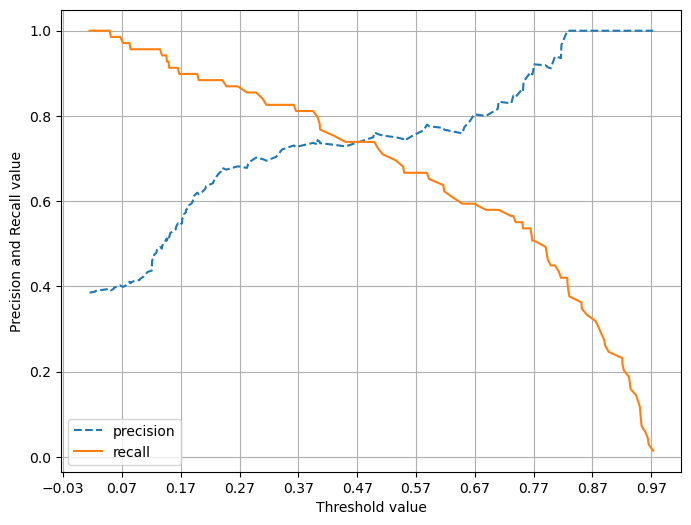

In [93]:
import matplotlib.pyplot as plt

def precision_recall_curve_plot(y_test , pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], '--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    # 이전 코드에 이어서 작성
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


In [94]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f'F1 스코어 : {f1:.4f}')

F1 스코어 : 0.7407


In [95]:
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))

0.7575757575757576
0.7246376811594203


In [96]:
# F1 스코어 추가
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1:{f1:.4f}')


In [98]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test ,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test, custom_predict)




In [99]:
thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[90 20]
 [14 55]]
정확도: 0.8101, 정밀도: 0.7333, 재현율: 0.7971, F1:0.7639
임곗값: 0.45
오차 행렬
[[92 18]
 [18 51]]
정확도: 0.7989, 정밀도: 0.7391, 재현율: 0.7391, F1:0.7391
임곗값: 0.5
오차 행렬
[[94 16]
 [19 50]]
정확도: 0.8045, 정밀도: 0.7576, 재현율: 0.7246, F1:0.7407
임곗값: 0.55
오차 행렬
[[95 15]
 [23 46]]
정확도: 0.7877, 정밀도: 0.7541, 재현율: 0.6667, F1:0.7077
임곗값: 0.6
오차 행렬
[[97 13]
 [25 44]]
정확도: 0.7877, 정밀도: 0.7719, 재현율: 0.6377, F1:0.6984


In [100]:
from sklearn.metrics import roc_curve
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 
fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))


샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51 56]
샘플 index로 추출한 임곗값:  [0.97 0.77 0.74 0.67 0.45 0.36 0.25 0.17 0.15 0.12 0.08 0.01]
샘플 임곗값별 FPR:  [0.    0.027 0.064 0.091 0.173 0.191 0.264 0.464 0.545 0.664 0.873 1.   ]
샘플 임곗값별 TPR:  [0.014 0.507 0.551 0.594 0.739 0.826 0.87  0.899 0.928 0.957 0.971 1.   ]


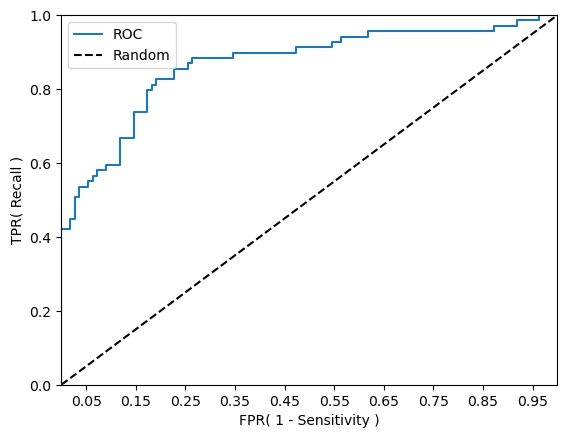

In [101]:
def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)
    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random') 
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [102]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC 값: {roc_score:.4f}')

ROC AUC 값: 0.8673


In [ ]:
# 이진분류
# 정확도        : 0 ~ 1, 얼마나 많이 맞추는지 나타내는 수치
# F1_Score      : 0 ~ 1, 밸런스가 잘 유지된다 라는 걸 표현하는 수치
# Roc_Auc_Score : 0 ~ 1, 전반적으로 잘 학습했는지를 표현하는 수치

# 정밀도 : 0 ~ 1, 예측을 1로했을때 얼마나 맞췄냐
# 재현율 : 0 ~ 1, 실제값이 1일때 얼마나 맞췄냐

In [112]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd

# 데이터 준비
df = pd.read_csv('data/ml/diabetes.csv')
y = df.iloc[:, -1]
X = df.iloc[:, :-1]

# 학습 / 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                   random_state=0)

# 머신러닝 모델 선택
dt_clf = DecisionTreeClassifier(random_state=0)

# 학습 / 예측
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)

# 평가(정확도/F1/Roc_auc)
print('정확도 :', accuracy_score(y_test, pred))
print('F1     :', f1_score(y_test, pred))
print('AUC    :', roc_auc_score(y_test, pred_proba[:, 1]))

정확도 : 0.7662337662337663
F1     : 0.6326530612244897
AUC    : 0.7363292901173195


In [113]:
from sklearn.linear_model import LogisticRegression
# 다른 머신러닝 모델 선택
lr_clf = LogisticRegression(solver='liblinear')

# 학습 / 예측
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)

# 평가(정확도/F1/Roc_auc)
print('정확도 :', accuracy_score(y_test, pred))
print('F1     :', f1_score(y_test, pred))
print('AUC    :', roc_auc_score(y_test, pred_proba[:, 1]))

정확도 : 0.8181818181818182
F1     : 0.6666666666666666
AUC    : 0.8687611851262677


In [ ]:
# DT
정확도 : 0.7662337662337663
F1     : 0.6326530612244897
AUC    : 0.7363292901173195
# LR
정확도 : 0.8181818181818182
F1     : 0.6666666666666666
AUC    : 0.8687611851262677

In [139]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state=10)

dt_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10,random_state=0)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)

In [140]:
confusion_matrix(y_test, pred)

array([[10,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  7]], dtype=int64)

In [141]:
accuracy_score(y_test, pred)

0.9333333333333333

In [142]:
np.array([[11,  1,  5],
 [ 7, 13,  2],
 [ 3,  4,  6]])

array([[11,  1,  5],
       [ 7, 13,  2],
       [ 3,  4,  6]])

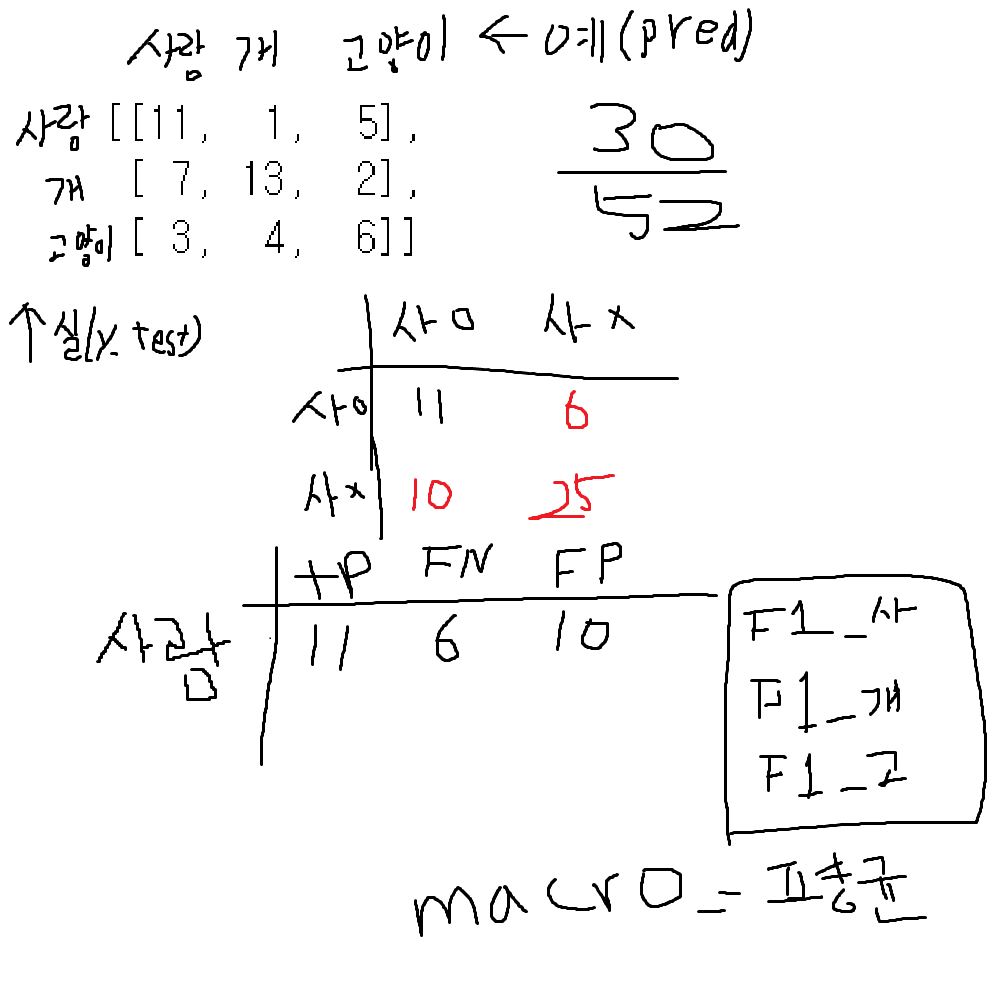

In [143]:
f1_score(y_test, pred, average='macro')

0.9305555555555555

In [144]:
# 위에서 구한 macro 방식에 데이터의 범주 비율을 계산해서 각 점수에 곱하고 더하는 방식
f1_score(y_test, pred, average='weighted')

0.9347222222222221

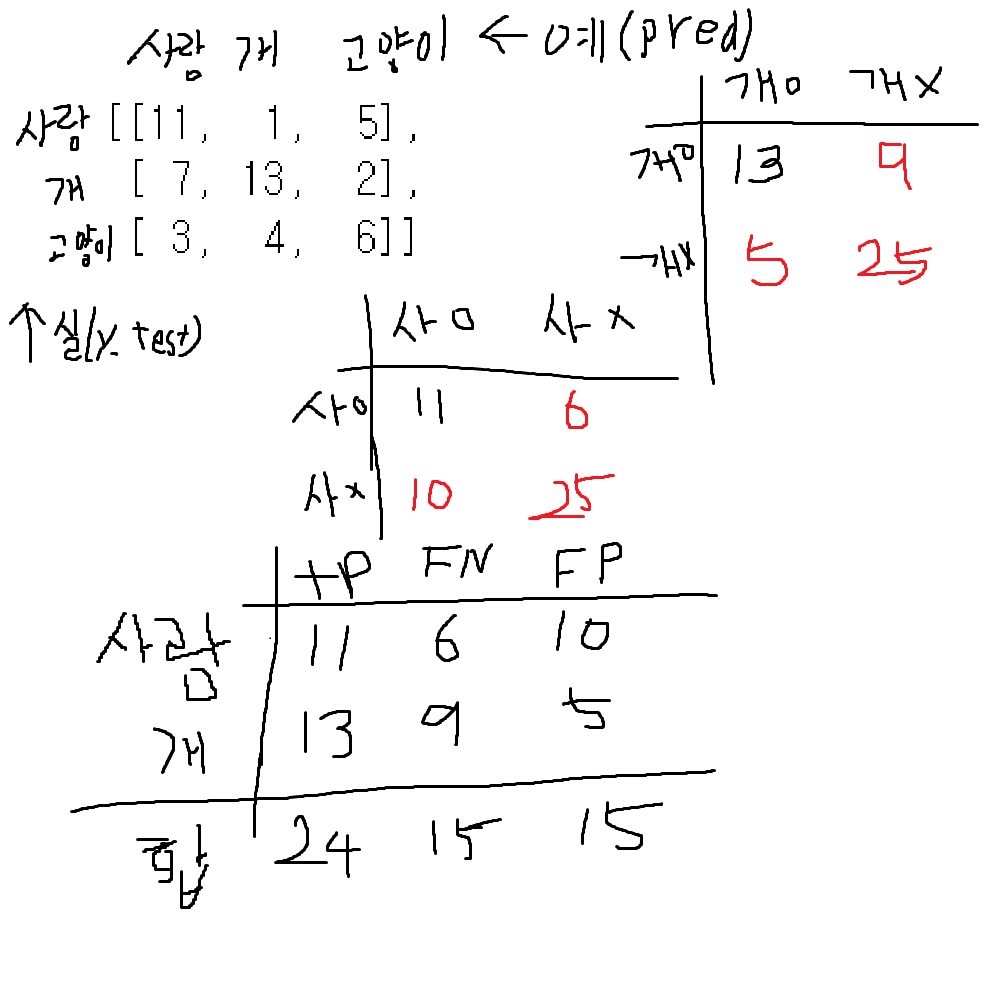

In [145]:
f1_score(y_test, pred, average='micro')

0.9333333333333333

In [146]:
# 다중분류
# Roc_Auc_Score 
roc_auc_score(y_test, pred_proba, multi_class='ovo')

0.9926739926739927

In [147]:
roc_auc_score(y_test, pred_proba, multi_class='ovr')

0.9928426219986323

In [ ]:
# ovo : 1대1 (사람vs개, 개vs고양이, 사람vs고양이)
# ovr : 1대다수(사람o vs 사람x, 고양이o vs 고양이x, 개o vs 개x)

In [153]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_train, y_train, scoring = 'accuracy', cv = 5)
# accuracy, precision, recall, f1, roc_auc
scores

array([0.91666667, 0.91666667, 0.95833333, 0.91666667, 0.95833333])

In [154]:
scores.mean()

0.9333333333333332

In [155]:
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9333333333333333

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.25, 0.375, 'x[1] <= 2.55\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.125, 0.125, 'gini = 0.18\nsamples = 10\nvalue = [0, 9, 1]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0]'),
 Text(0.75, 0.375, 'x[2] <= 5.15\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.625, 0.125, 'gini = 0.36\nsamples = 17\nvalue = [0, 4, 13]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

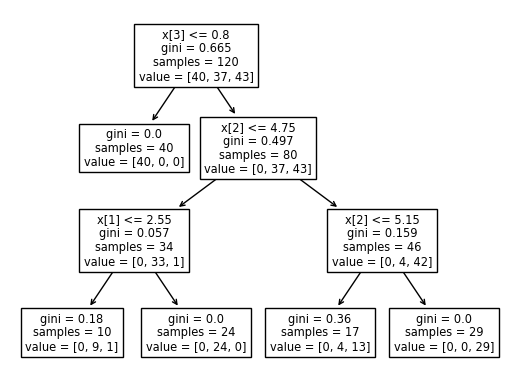

In [156]:
from sklearn.tree import plot_tree

plot_tree(dt_clf)